In [1]:
import plotly
import plotly.plotly as py

In [7]:
from stocker import Stocker

In [8]:
tesla = Stocker('TSLA')

TSLA Stocker Initialized. Data covers 2010-06-29 00:00:00 to 2018-03-27 00:00:00.


In [9]:
stock_history = tesla.stock
stock_history.head()

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,ds,y,Daily Change
0,2010-06-29,19.00,25.0000,17.54,23.89,18766300.0,0.0,1.0,19.00,25.0000,17.54,23.89,18766300.0,2010-06-29,23.89,4.89
1,2010-06-30,25.79,30.4192,23.30,23.83,17187100.0,0.0,1.0,25.79,30.4192,23.30,23.83,17187100.0,2010-06-30,23.83,-1.96
2,2010-07-01,25.00,25.9200,20.27,21.96,8218800.0,0.0,1.0,25.00,25.9200,20.27,21.96,8218800.0,2010-07-01,21.96,-3.04
3,2010-07-02,23.00,23.1000,18.71,19.20,5139800.0,0.0,1.0,23.00,23.1000,18.71,19.20,5139800.0,2010-07-02,19.20,-3.80
4,2010-07-06,20.00,20.0000,15.83,16.11,6866900.0,0.0,1.0,20.00,20.0000,15.83,16.11,6866900.0,2010-07-06,16.11,-3.89


Maximum Adj. Close = 385.00 on 2017-09-18 00:00:00.
Minimum Adj. Close = 15.80 on 2010-07-07 00:00:00.
Current Adj. Close = 279.18 on 2018-03-27 00:00:00.



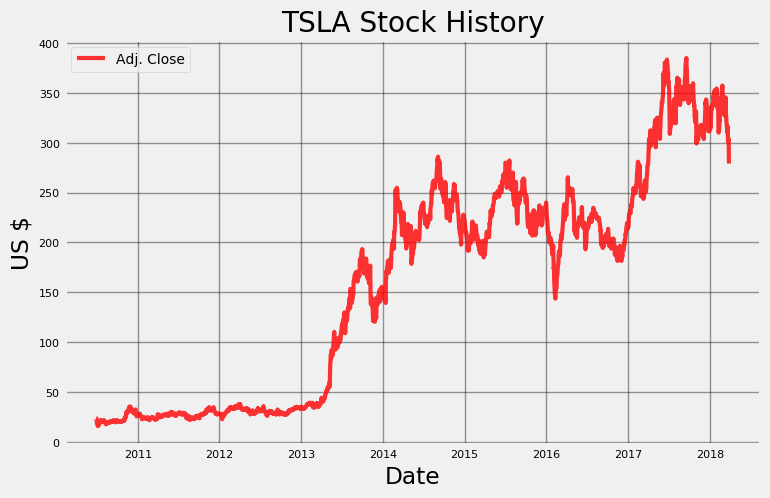

In [10]:
tesla.plot_stock()

Maximum Daily Change = 20.77 on 2014-01-14 00:00:00.
Minimum Daily Change = -27.95 on 2018-02-08 00:00:00.
Current Daily Change = -24.82 on 2018-03-27 00:00:00.

Maximum Adj. Volume = 37163900.00 on 2013-05-14 00:00:00.
Minimum Adj. Volume = 118500.00 on 2010-10-25 00:00:00.
Current Adj. Volume = 13696168.00 on 2018-03-27 00:00:00.



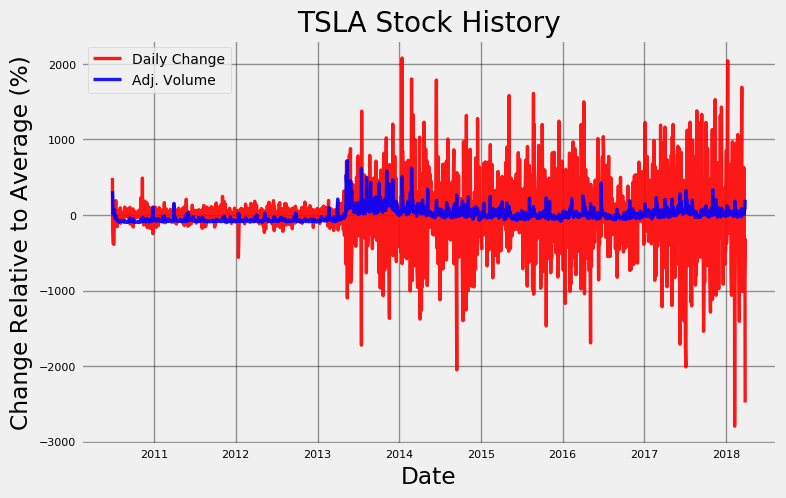

In [11]:
tesla.plot_stock(start_date='2010-06-29',end_date='2018-03-27',
                 stats=['Daily Change','Adj. Volume'],plot_type='pct')

TSLA Total buy and hold profit from 2010-06-29 00:00:00 to 2018-03-27 00:00:00 for 500 shares = $130090.00


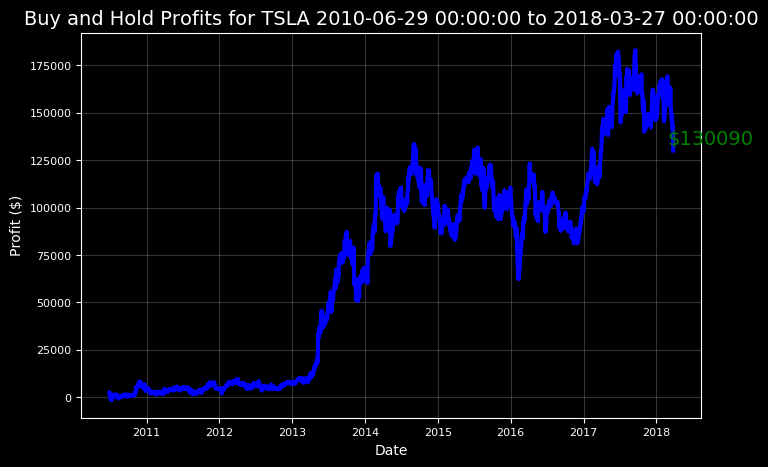

In [12]:
tesla.buy_and_hold(nshares=500)

/Users/chrislouie/anaconda3/envs/ruwai/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



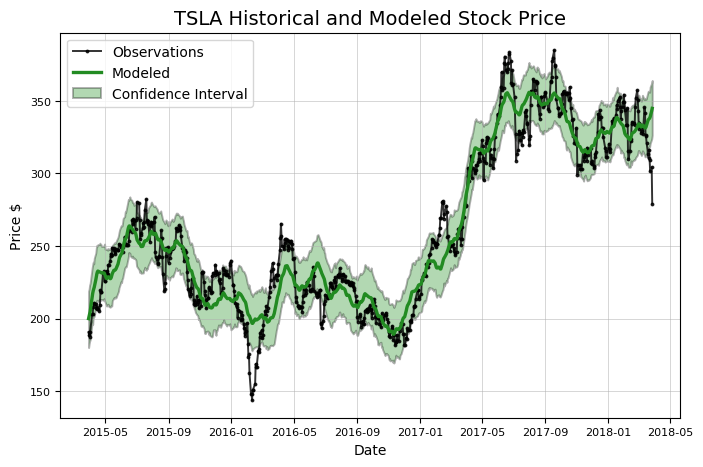

In [13]:
model,model_data= tesla.create_prophet_model()

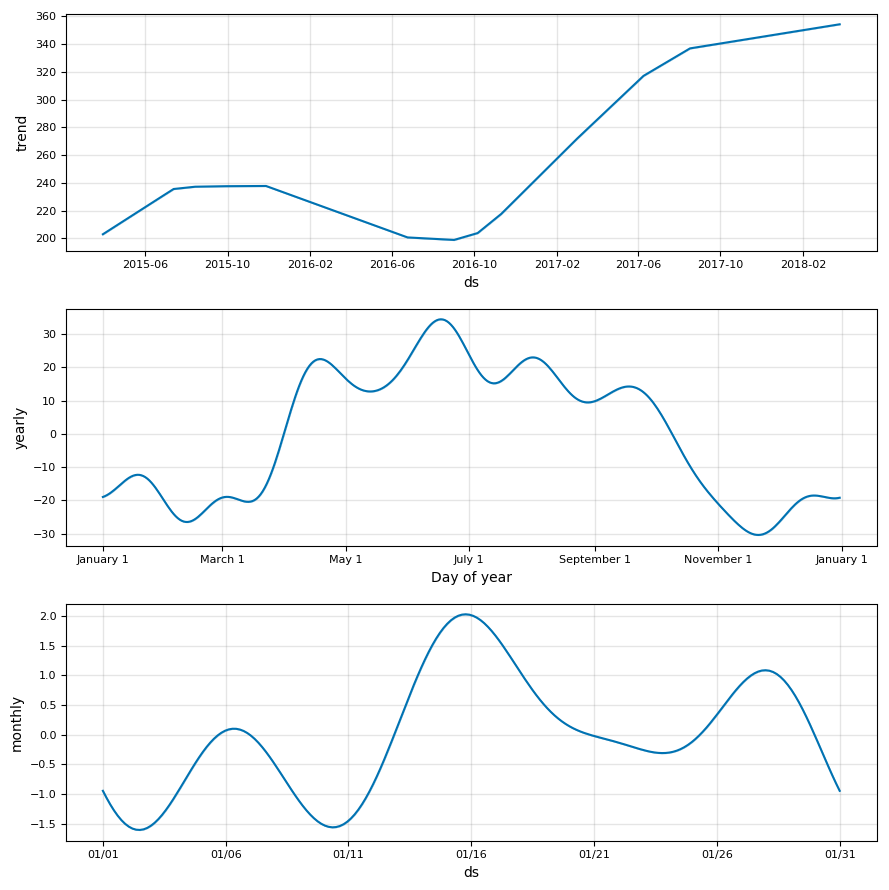

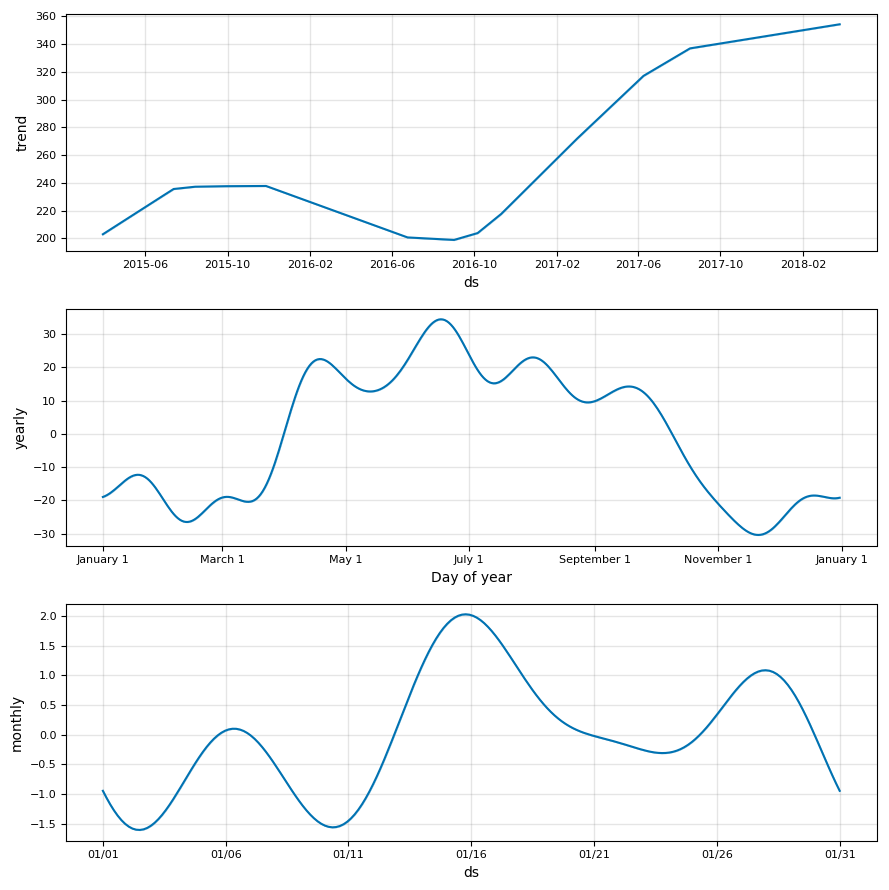

In [14]:
model.plot_components(model_data)

/Users/chrislouie/anaconda3/envs/ruwai/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.




Changepoints sorted by slope rate of change (2nd derivative):

          Date  Adj. Close     delta
72  2015-07-13      262.16 -0.728114
385 2016-10-06      201.00  0.711447
602 2017-08-17      351.92 -0.593784
169 2015-11-27      231.61 -0.509165
554 2017-06-09      357.32 -0.488600


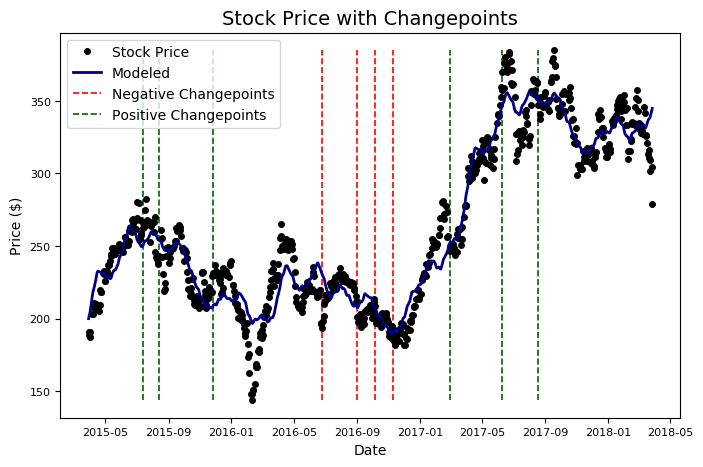

In [15]:
tesla.changepoint_date_analysis()

/Users/chrislouie/anaconda3/envs/ruwai/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



Predicted Price on 2018-06-25 00:00:00 = $393.06


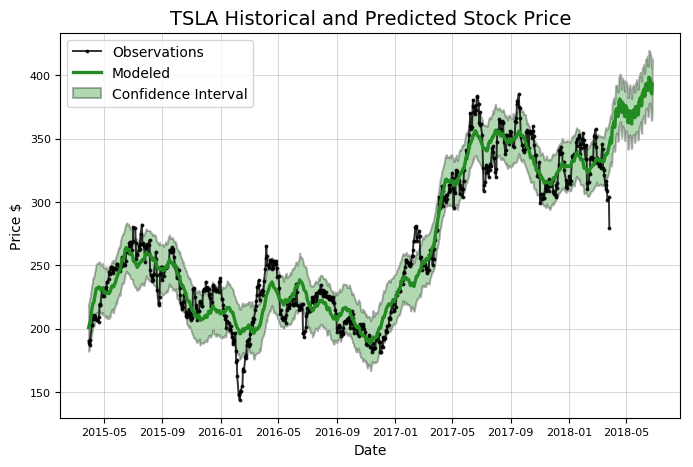

In [16]:
tesla.weekly_seasonality=True
model,model_data=tesla.create_prophet_model(days=90)


Prediction Range: 2017-03-27 00:00:00 to 2018-03-27 00:00:00.

Predicted price on 2018-03-24 00:00:00 = $436.36.
Actual price on    2018-03-23 00:00:00 = $301.54.

Average Absolute Error on Training Data = $12.55.
Average Absolute Error on Testing  Data = $29.61.

When the model predicted an increase, the price increased 47.44% of the time.
When the model predicted a  decrease, the price decreased  44.09% of the time.

The actual value was within the 80% confidence interval 64.80% of the time.


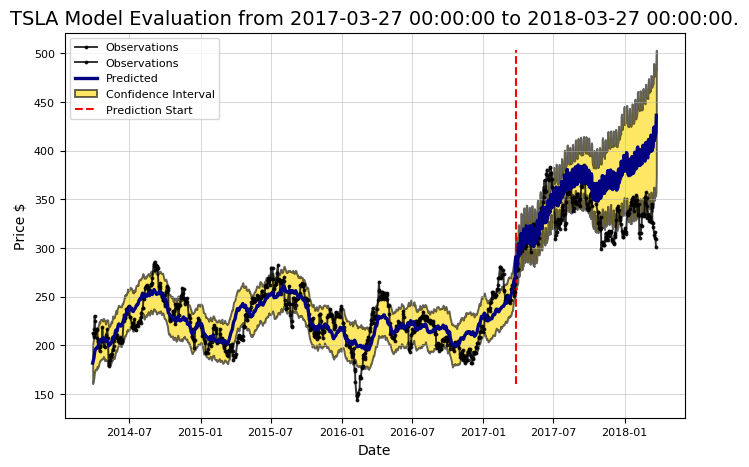

In [17]:
tesla.evaluate_prediction()

/Users/chrislouie/anaconda3/envs/ruwai/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



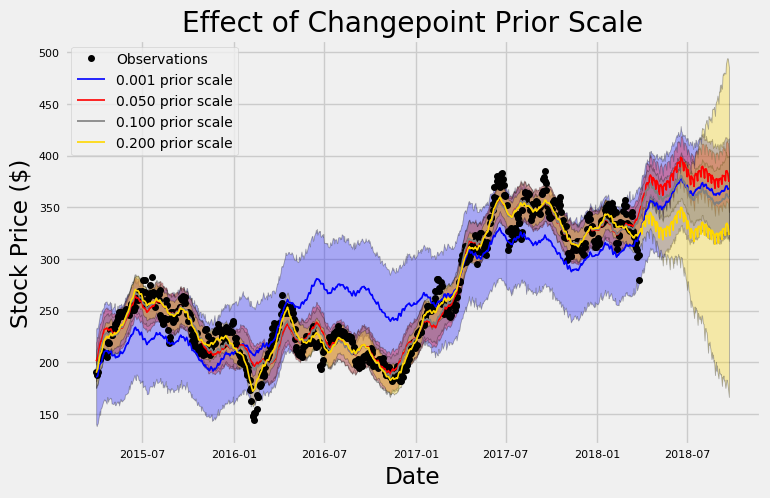

In [18]:
tesla.changepoint_prior_analysis(changepoint_priors=[0.001, 0.05, 0.1, 0.2])


Validation Range 2016-01-04 00:00:00 to 2017-01-03 00:00:00.



/Users/chrislouie/anaconda3/envs/ruwai/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



     cps  train_err  train_range    test_err  test_range
0  0.001  29.812689    90.069380  121.996427   90.003660
1  0.050  13.022537    40.549459   30.540667   46.372636
2  0.100   9.471903    29.966574   27.874873  175.046066
3  0.200   7.191993    23.225411   83.762532  356.611931


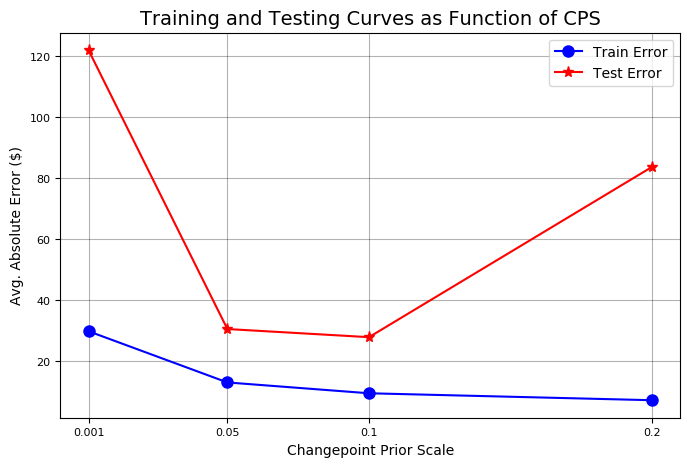

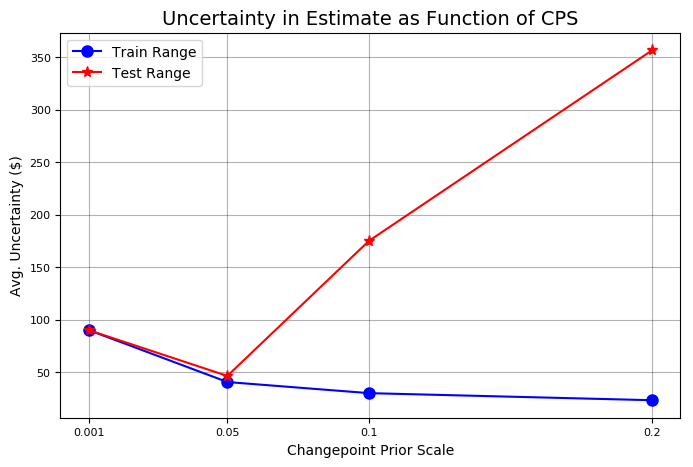

In [19]:
tesla.changepoint_prior_validation(start_date='2016-01-04', end_date='2017-01-03', changepoint_priors=[0.001, 0.05, 0.1, 0.2])


Validation Range 2016-01-04 00:00:00 to 2017-01-03 00:00:00.



/Users/chrislouie/anaconda3/envs/ruwai/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



    cps  train_err  train_range    test_err  test_range
0  0.15   7.513823    24.172612   62.693387  306.789817
1  0.20   7.191993    23.203985   83.762532  351.384538
2  0.25   6.983674    22.492428   99.238433  397.228264
3  0.40   6.588787    21.208291  122.374386  489.416527
4  0.50   6.469724    20.811128  133.226795  552.471707
5  0.60   6.392211    20.648287  138.303482  548.927025


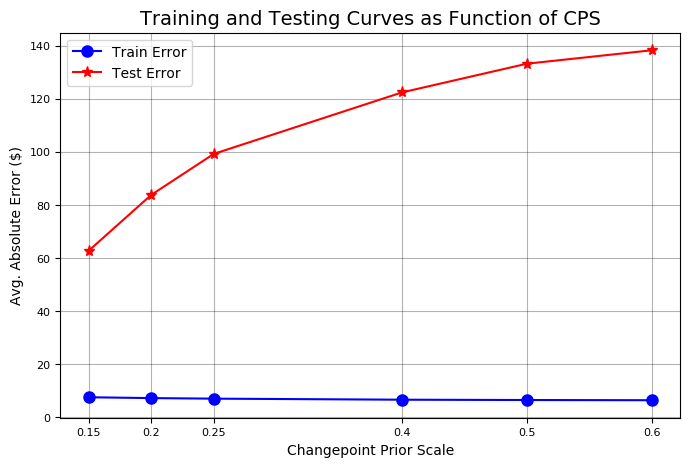

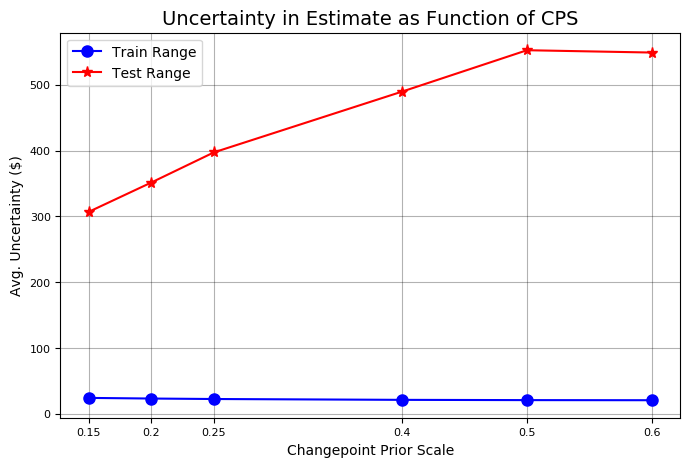

In [20]:
tesla.changepoint_prior_validation(start_date='2016-01-04', end_date='2017-01-03', changepoint_priors=[0.15, 0.2, 0.25,0.4, 0.5, 0.6])

In [21]:
tesla.changepoint_prior_scale = 0.5

/Users/chrislouie/anaconda3/envs/ruwai/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.




Prediction Range: 2017-03-27 00:00:00 to 2018-03-27 00:00:00.

Predicted price on 2018-03-24 00:00:00 = $284.94.
Actual price on    2018-03-23 00:00:00 = $301.54.

Average Absolute Error on Training Data = $7.69.
Average Absolute Error on Testing  Data = $82.41.

When the model predicted an increase, the price increased 45.74% of the time.
When the model predicted a  decrease, the price decreased  44.17% of the time.

The actual value was within the 80% confidence interval 72.80% of the time.


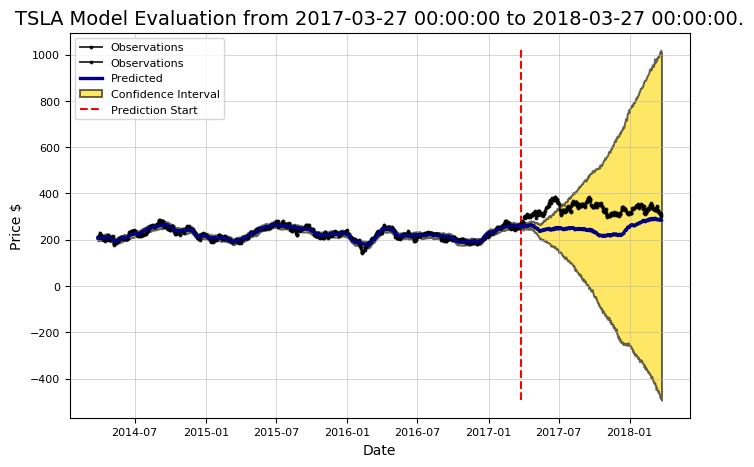

In [22]:
tesla.evaluate_prediction()

/Users/chrislouie/anaconda3/envs/ruwai/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.




Predicted Increase: 

         Date    estimate    change       upper       lower
1  2018-03-28  321.729985  1.553800  333.525045  309.861661
2  2018-03-29  322.092583  0.362597  333.237039  310.484891
3  2018-03-30  323.339027  1.246445  335.356601  312.144073
6  2018-04-02  326.340124  9.342021  339.017047  313.502075
8  2018-04-04  327.204928  0.935447  339.210044  314.696073
9  2018-04-05  327.237261  0.032333  340.865469  314.748449
10 2018-04-06  328.290240  1.052979  341.236238  316.334871
13 2018-04-09  330.665744  9.174455  342.833207  317.460844
15 2018-04-11  331.152013  0.667464  343.880195  318.185345
20 2018-04-16  329.851582  8.623727  344.524384  314.503513
22 2018-04-18  330.057148  0.539999  344.357747  314.143963
27 2018-04-23  323.877207  7.280691  339.366648  306.533931

Predicted Decrease: 

         Date    estimate     change       upper       lower
5  2018-04-01  316.998103  -6.340925  329.575028  306.424983
7  2018-04-03  326.269481  -0.070643  338.464858  31

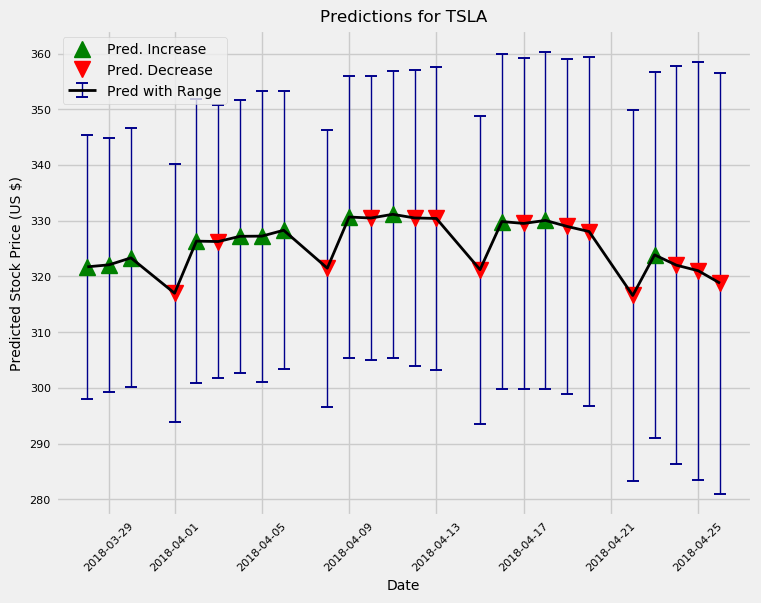

In [23]:
tesla.predict_future()

/Users/chrislouie/anaconda3/envs/ruwai/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.




Predicted Increase: 

         Date    estimate     change       upper       lower
1  2018-03-28  321.729985   1.553800  333.846561  310.680467
2  2018-03-29  322.092583   0.362597  334.103457  310.339834
3  2018-03-30  323.339027   1.246445  334.763580  311.246418
6  2018-04-02  326.340124   9.342021  337.768627  314.281070
8  2018-04-04  327.204928   0.935447  338.941556  314.291743
9  2018-04-05  327.237261   0.032333  339.474992  314.769211
10 2018-04-06  328.290240   1.052979  340.136532  315.820300
13 2018-04-09  330.665744   9.174455  343.383319  317.160857
15 2018-04-11  331.152013   0.667464  345.190843  317.460166
20 2018-04-16  329.851582   8.623727  343.472089  314.851936
22 2018-04-18  330.057148   0.539999  347.047885  315.196589
27 2018-04-23  323.877207   7.280691  342.276379  306.771467
34 2018-04-30  316.503957   8.449465  340.912660  295.055756
41 2018-05-07  309.316915   9.038301  341.637942  280.563828
48 2018-05-14  307.029474   9.114916  344.974437  270.261831
5

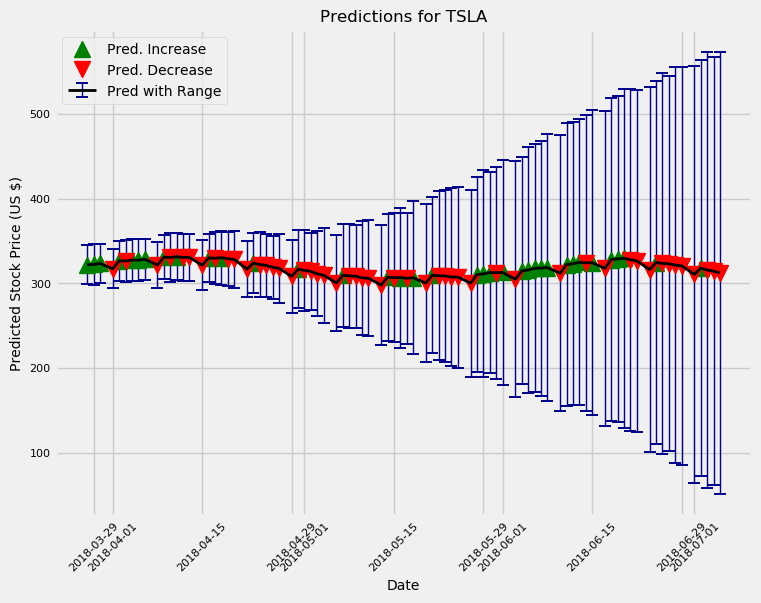

In [24]:
tesla.predict_future(days=100)

/Users/chrislouie/anaconda3/envs/ruwai/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.




Predicted Increase: 

         Date    estimate    change       upper       lower
1  2018-03-28  321.729985  1.553800  333.464051  309.195411
2  2018-03-29  322.092583  0.362597  333.703710  309.900411
3  2018-03-30  323.339027  1.246445  335.520316  310.358554
6  2018-04-02  326.340124  9.342021  338.386066  313.964395
8  2018-04-04  327.204928  0.935447  339.684301  315.346395
9  2018-04-05  327.237261  0.032333  339.822596  315.026816
10 2018-04-06  328.290240  1.052979  340.780583  316.690956
13 2018-04-09  330.665744  9.174455  342.962101  317.390358
15 2018-04-11  331.152013  0.667464  344.973723  317.588736
20 2018-04-16  329.851582  8.623727  343.709749  313.939890
22 2018-04-18  330.057148  0.539999  343.676050  314.859159
27 2018-04-23  323.877207  7.280691  341.614790  305.767183

Predicted Decrease: 

         Date    estimate     change       upper       lower
5  2018-04-01  316.998103  -6.340925  329.626072  305.153876
7  2018-04-03  326.269481  -0.070643  336.945448  31

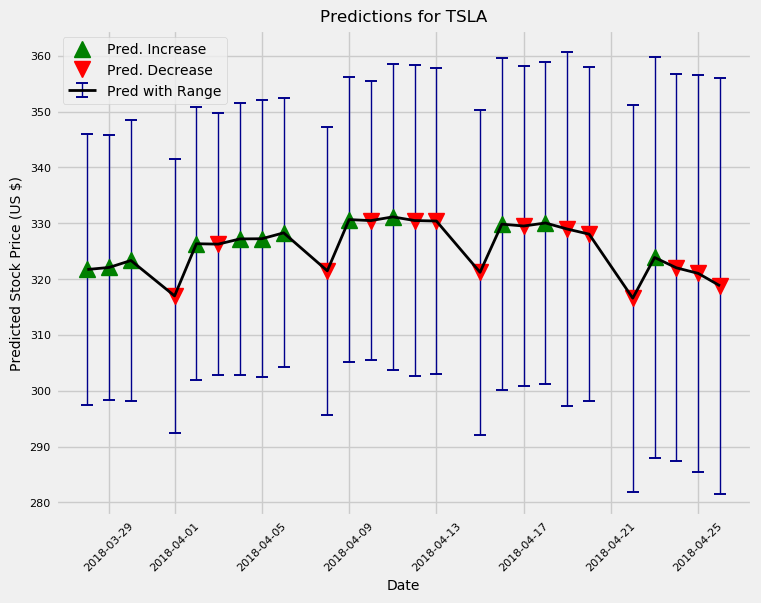

In [25]:
df = tesla.predict_future()

In [26]:
df = tesla.make_df(start_date='2010-06-29',end_date='2018-03-27')
print(df.shape)
df.head()

(1949, 16)


,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,ds,y,Daily Change
0,2010-06-29,19.00,25.0000,17.54,23.89,18766300.0,0.0,1.0,19.00,25.0000,17.54,23.89,18766300.0,2010-06-29,23.89,4.89
1,2010-06-30,25.79,30.4192,23.30,23.83,17187100.0,0.0,1.0,25.79,30.4192,23.30,23.83,17187100.0,2010-06-30,23.83,-1.96
2,2010-07-01,25.00,25.9200,20.27,21.96,8218800.0,0.0,1.0,25.00,25.9200,20.27,21.96,8218800.0,2010-07-01,21.96,-3.04
3,2010-07-02,23.00,23.1000,18.71,19.20,5139800.0,0.0,1.0,23.00,23.1000,18.71,19.20,5139800.0,2010-07-02,19.20,-3.80
4,2010-07-06,20.00,20.0000,15.83,16.11,6866900.0,0.0,1.0,20.00,20.0000,15.83,16.11,6866900.0,2010-07-06,16.11,-3.89


In [27]:
up_days = []
down_days = []

for i in range(0,len(df)):
    if df['Daily Change'][i] > 0:
        up_days.append(1)
        down_days.append(0)
    elif df['Daily Change'][i] < 0:
        down_days.append(1)
        up_days.append(0)
    else:
        down_days.append(0)
        up_days.append(0)
print(len(up_days))
print(len(down_days))
df['Up Days'] = up_days
df['Down Days'] = down_days
df.head()

1949
1949


,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,ds,y,Daily Change,Up Days,Down Days
0,2010-06-29,19.00,25.0000,17.54,23.89,18766300.0,0.0,1.0,19.00,25.0000,17.54,23.89,18766300.0,2010-06-29,23.89,4.89,1,0
1,2010-06-30,25.79,30.4192,23.30,23.83,17187100.0,0.0,1.0,25.79,30.4192,23.30,23.83,17187100.0,2010-06-30,23.83,-1.96,0,1
2,2010-07-01,25.00,25.9200,20.27,21.96,8218800.0,0.0,1.0,25.00,25.9200,20.27,21.96,8218800.0,2010-07-01,21.96,-3.04,0,1
3,2010-07-02,23.00,23.1000,18.71,19.20,5139800.0,0.0,1.0,23.00,23.1000,18.71,19.20,5139800.0,2010-07-02,19.20,-3.80,0,1
4,2010-07-06,20.00,20.0000,15.83,16.11,6866900.0,0.0,1.0,20.00,20.0000,15.83,16.11,6866900.0,2010-07-06,16.11,-3.89,0,1


In [39]:
# def make_a_future_dataframe(self,periods=30,freq='D'):
#     '''
#         Added by Chris Louie for stockly
#     '''
#     train = self.stock[self.stock['Date'] > (max(self.stock['Date']) - pd.DateOffset(years=self.training_years))]
    
#     model = self.create_model()
#     model.fit(train)
    
#     future = model.make_future_dataframe(periods=periods,freq=freq)
#     future = model.predict(future)
    
#     preds = future[future['ds'] >= max(self.stock['Date'])]
#     preds = self.remove_weekends(preds)
#     preds['diff'] = preds['yhat'].diff()
#     preds = preds.dropna()
#     preds['direction'] = (preds['diff'] > 0) * 1
#     preds = preds.rename(columns={
#         'ds': 'Date', 'yhat': 'estimate', 'diff': 'change', 
#         'yhat_upper': 'upper', 'yhat_lower': 'lower'
#     })
    
#     up_days = []
#     down_days = []

#     for i in range(0,len(preds)):
#     if preds['estimate'][i] > 0:
#         up_days.append(1)
#         down_days.append(0)
#     elif preds['estimate'][i] < 0:
#         down_days.append(1)
#         up_days.append(0)
#     else:
#         down_days.append(0)
#         up_days.append(0)
#     print(len(up_days))
#     print(len(down_days))
#     preds['Up Days'] = up_days
#     preds['Down Days'] = down_days
    
#     return preds
    

In [44]:
tesla.make_a_future_dataframe()

KeyError: 0

In [30]:
# def auto_make_a_df(self, start_date=self.min_date, end_date=self.max_date,df=None):
#     '''
#         Added by Chris Louie for stockly
#     '''
#     # Default is to use the object stock data
#     if not df:
#         df = self.stock.copy()


#     start_date, end_date = self.handle_dates(start_date, end_date)

#     # keep track of whether the start and end dates are in the data
#     start_in = True
#     end_in = True

#     # If user wants to round dates (default behavior)
#     if self.round_dates:
#         # Record if start and end date are in df
#         if (start_date not in list(df['Date'])):
#             start_in = False
#         if (end_date not in list(df['Date'])):
#             end_in = False

#         # If both are not in dataframe, round both
#         if (not end_in) & (not start_in):
#             trim_df = df[(df['Date'] >= start_date) & 
#                          (df['Date'] <= end_date)]

#         else:
#             # If both are in dataframe, round neither
#             if (end_in) & (start_in):
#                 trim_df = df[(df['Date'] >= start_date) & 
#                              (df['Date'] <= end_date)]
#             else:
#                 # If only start is missing, round start
#                 if (not start_in):
#                     trim_df = df[(df['Date'] > start_date) & 
#                                  (df['Date'] <= end_date)]
#                 # If only end is imssing round end
#                 elif (not end_in):
#                     trim_df = df[(df['Date'] >= start_date) & 
#                                  (df['Date'] < end_date)]


#     else:
#         valid_start = False
#         valid_end = False
#         while (not valid_start) & (not valid_end):
#             start_date, end_date = self.handle_dates(start_date, end_date)

#             # No round dates, if either data not in, print message and return
#             if (start_date in list(df['Date'])):
#                 valid_start = True
#             if (end_date in list(df['Date'])):
#                 valid_end = True

#             # Check to make sure dates are in the data
#             if (start_date not in list(df['Date'])):
#                 print('Start Date not in data (either out of range or not a trading day.)')
#                 start_date = pd.to_datetime(input(prompt='Enter a new start date: '))

#             elif (end_date not in list(df['Date'])):
#                 print('End Date not in data (either out of range or not a trading day.)')
#                 end_date = pd.to_datetime(input(prompt='Enter a new end date: ') )

#         # Dates are not rounded
#         trim_df = df[(df['Date'] >= start_date) & 
#                      (df['Date'] <= end_date.date)]

#     up_days = []
#     down_days = []

#     for i in range(0,len(trim_df)):
#         if trim_df['Daily Change'][i] > 0:
#             up_days.append(1)
#             down_days.append(0)
#         elif trim_df['Daily Change'][i] < 0:
#             down_days.append(1)
#             up_days.append(0)
#         else:
#             down_days.append(0)
#             up_days.append(0)
#     print(len(up_days))
#     print(len(down_days))
#     trim_df['Up Days'] = up_days
#     trim_df['Down Days'] = down_days

#     return trim_df

In [31]:
import pandas_datareader.data as web

In [32]:
from alpha_vantage.timeseries import TimeSeries
from pprint import pprint

In [33]:
def get_historical_analysis():
    pass

In [34]:
ts = TimeSeries(key='0GOYV58FN3FF3CO2',output_format='pandas')

In [35]:
data,meta_data = ts.get_intraday('GOOGL',interval='1min',outputsize='full')
pprint(data.head(2))

                       1. open  2. high     3. low   4. close  5. volume
date                                                                    
2019-05-14 09:31:00  1142.3199  1144.28  1140.7500  1143.6450    54139.0
2019-05-14 09:32:00  1143.8850  1144.63  1142.7926  1144.3199     8171.0


In [36]:
data.head()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2019-05-14 09:31:00,1142.3199,1144.280,1140.7500,1143.6450,54139.0
2019-05-14 09:32:00,1143.8850,1144.630,1142.7926,1144.3199,8171.0
2019-05-14 09:33:00,1144.8650,1144.865,1142.1500,1142.4500,13150.0
2019-05-14 09:34:00,1142.6050,1142.605,1141.6899,1141.9882,2739.0
2019-05-14 09:35:00,1141.8800,1142.770,1141.1200,1141.5570,10241.0


In [37]:
test = 'TSLA'

data,meta_data = ts.get_daily(test,outputsize='full')
data.tail()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2019-05-14,229.30,234.50,228.00,232.31,7252412.0
2019-05-15,229.32,232.44,225.25,231.95,7295976.0
2019-05-16,229.49,231.00,226.50,228.33,7483273.0
2019-05-17,221.96,222.24,208.92,211.03,17786666.0
2019-05-20,202.80,206.00,195.25,204.68,19690844.0


AttributeError: 'DataFrame' object has no attribute 'auto_make_a_df'